# <center>Project of Machine Learning</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*TO GRANT OR NOT TO GRANT: DECIDING ON COMPENSATION BENEFITS*</center>

<center>
Group 17 <br>
Diogo Ruivo, 20240584  <br>
José Tiago, 20240582  <br>
Matilde Miguel, 20240549  <br>
Nuno Sousa, 20222125  <br>
Rafael Lopes, 20240588  <br>



    
</center>


** **

## Project Description     
This project addresses the task of automating decisions on compensation in insurance claims related to workplace injuries. Using historical data from the New York WCB, our objective is to predict the type of compensation a claim will be awarded, thereby optimizing the decision-making process and improving consistency in outcomes.   

This project aims to build a robust predictive model to classify injury claims in a multiclass classification scenario, explore and optimize model performance through preprocessing techniques and hyperparameter tuning and provide interpretative analysis to identify the most influential variables in the final decision.


In [311]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

#data partition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
#from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold

#empty values
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

#feature engineering
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.linear_model import LassoCV
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [312]:
pd.set_option('display.max_columns', None)

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import Dataset
    
</a>

In [313]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')

we had one of the missing columns of test, using as example the one in train

In [314]:
test_original = test.copy()
%store -r Agreement_Reached
test['Agreement Reached'] = Agreement_Reached

after adding the column we organize the test dataset to have the same column order as the train dataset

In [315]:
cols = test.columns.tolist()
cols[-2], cols[-1] = cols[-1], cols[-2]
test = test[cols]

<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>



In [316]:
train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [317]:
test.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,0.0,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,0.0,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0.0,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,0.0,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,0.0,5


In [318]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 33)
Test dimensions: (387975, 31)


In [319]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)

Train columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')
Test columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',


In [320]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [321]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [322]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,574026,5.934710e+05,574026,574026,574026,574026,150798,574026,132803.000000,564068.000000,564068,574026,0.0,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,8,NaN,8,63,2,8,1094,4,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,NaN,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,285368,NaN,291078,60430,546505,270779,440,335218,NaN,NaN,114339,265981,NaN,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,NaN,2.366760e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.207337,58.645305,NaN,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,NaN,1.079271e+08,NaN,NaN,NaN,NaN,NaN,NaN,2.832303,19.644175,NaN,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,5.393066e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,NaN,5.593414e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,NaN,5.791212e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,NaN,5.991000e+06,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,71.000000,NaN,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


In [323]:
test.describe(include = 'all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
count,385531,387975.000000,387975,387975,387975,3.687710e+05,368505.000000,378841,85216,387975,387975,3.879750e+05,387975,387975,387975,43028,387975,35249.000000,380239.000000,380239,387975,0.0,377627.000000,377627,377415.000000,377415,378426.000000,378426,368633,387975.000000,387975.000000
unique,3438,NaN,3,434,2,NaN,NaN,1048,626,1598,7,NaN,63,2,8,338,4,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,51,6276,NaN,NaN
top,2024-01-16,NaN,N,2023-09-21,N,NaN,NaN,2023-10-11,2023-10-04,STATE INSURANCE FUND,1A. PRIVATE,NaN,QUEENS,N,NYC,2024-02-06,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,"FELLOW WORKER, PATIENT OR OTHER PERSON",NaN,STRAIN OR TEAR,NaN,MULTIPLE,11368,NaN,NaN
freq,1263,NaN,386314,1789,306476,NaN,NaN,1687,341,66189,201827,NaN,40358,385434,187972,329,215343,NaN,NaN,72207,182276,NaN,NaN,33293,NaN,108326,NaN,67465,2068,NaN,NaN
mean,NaN,41.414944,NaN,NaN,NaN,1.833438e+02,1875.383466,NaN,NaN,NaN,NaN,6.359878e+06,NaN,NaN,NaN,NaN,NaN,2.118131,58.653581,NaN,NaN,NaN,53.335678,NaN,38.373674,NaN,31.516109,NaN,NaN,0.004472,3.000284
std,NaN,14.501056,NaN,NaN,NaN,3.542310e+03,444.659075,NaN,NaN,NaN,NaN,1.121062e+05,NaN,NaN,NaN,NaN,NaN,1.465406,18.710501,NaN,NaN,NaN,26.176833,NaN,20.966100,NaN,23.359950,NaN,NaN,0.066723,1.997982
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,6.165686e+06,NaN,NaN,NaN,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,0.000000e+00,1967.000000,NaN,NaN,NaN,NaN,6.262798e+06,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN,NaN,29.000000,NaN,10.000000,NaN,15.000000,NaN,NaN,0.000000,1.000000
50%,NaN,40.000000,NaN,NaN,NaN,0.000000e+00,1980.000000,NaN,NaN,NaN,NaN,6.359876e+06,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,43.000000,NaN,36.000000,NaN,NaN,0.000000,3.000000
75%,NaN,53.000000,NaN,NaN,NaN,0.000000e+00,1992.000000,NaN,NaN,NaN,NaN,6.456966e+06,NaN,NaN,NaN,NaN,NaN,2.000000,71.000000,NaN,NaN,NaN,74.000000,NaN,52.000000,NaN,51.000000,NaN,NaN,0.000000,5.000000


<hr>
<a class="anchor" id="furtheranalysis">
    
## 3.1 Further Analysis
    
</a>

In [324]:
print('youngest person:',train['Birth Year'].max())
print('oldest injured:',train['Age at Injury'].max())
print('most dependents:',train['Number of Dependents'].max())

youngest person: 2018.0
oldest injured: 117.0
most dependents: 6.0


In [325]:
for i in train.columns:
    print(i)
    print(train[i].unique())
    print(train[i].value_counts())
    print('\n')

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     

<hr>
<a class="anchor" id="graphicalrepresentaion">
    
### 3.1.1 Graphical Representaion
    
</a>

In [326]:
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train.select_dtypes(include=[object]).columns.tolist()

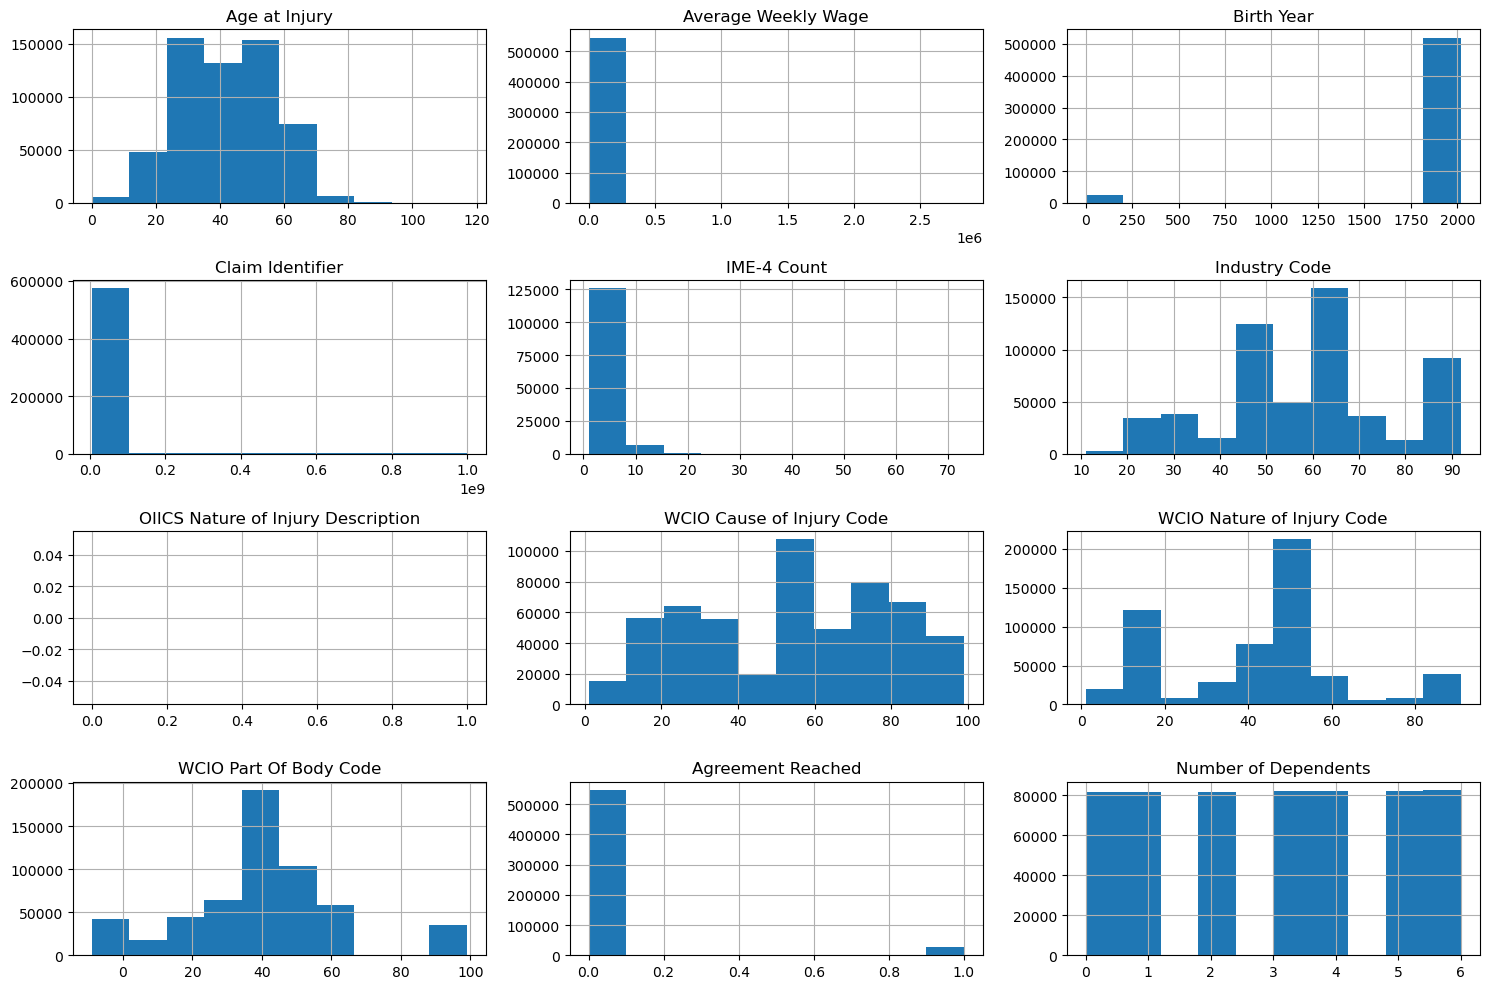

In [327]:
train[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

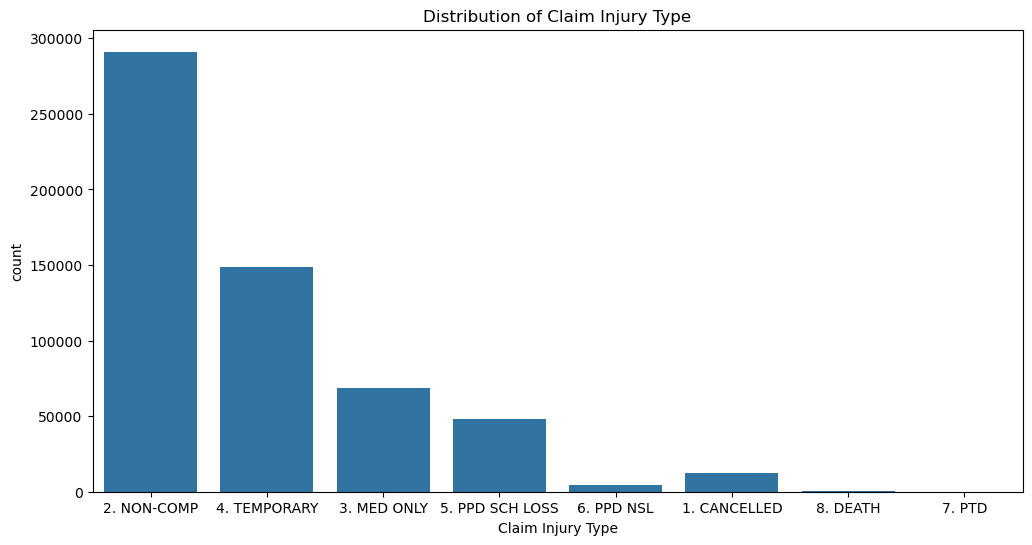

In [328]:
plt.figure(figsize=(12, 6))
sns.countplot( x= 'Claim Injury Type', data = train)
plt.title('Distribution of Claim Injury Type')
plt.show()

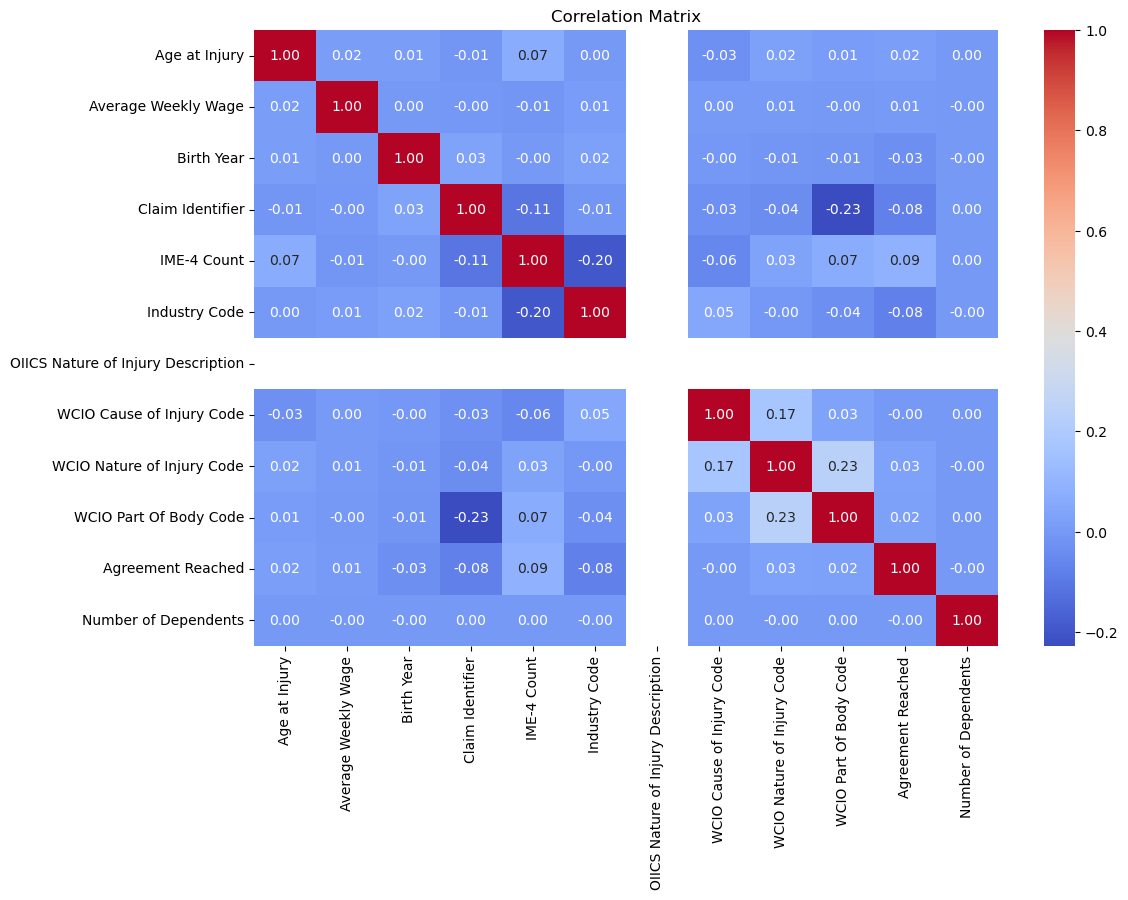

In [329]:
corr_matrix = train[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<hr>
<a class="anchor" id="initialanalysis">
    
# 4. Preprocessing
    
</a>



set Claim Identifier as index

In [330]:
train.set_index('Claim Identifier', inplace=True)
test.set_index('Claim Identifier', inplace=True)

<hr>
<a class="anchor" id="furtheranalysis">
    
## 4.1 Drop Duplicates
    
</a>

In [331]:
train.drop_duplicates(inplace=True)

<hr>
<a class="anchor" id="furtheranalysis">
    
## 4.2 Drop Columns
    
</a>

WCB Decision is not in test and have just one value

In [332]:
train.drop(['WCB Decision'], inplace = True, axis = 1)

the column don't have data

In [333]:
train.drop(['OIICS Nature of Injury Description'], inplace=True, axis=1)
test.drop(['OIICS Nature of Injury Description'], inplace=True, axis=1)

<hr>
<a class="anchor" id="furtheranalysis">
    
## 4.3 Drop Rows
    
</a>

we eliminate the lines that do not have Claim Injury Type

In [334]:
train.dropna(subset=['Claim Injury Type'], inplace=True)

we eliminate rows with only 1, 2 or 3 values, as we see that 'C-3 Date', 'First Hearing Date' and 'IME-4 Count' columns have +- 70% of the values ​​missing

In [335]:
train = train.dropna(thresh=4)

<hr>
<a class="anchor" id="furtheranalysis">
    
## 4.4 Categorization
    
</a>

we had a code wrongly labeled, so we change it to have the value 0

In [336]:
train['WCIO Part Of Body Code'] = train['WCIO Part Of Body Code'].apply(lambda x: 0 if x < 0 else x)
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].apply(lambda x: 0 if x < 0 else x)

In [337]:
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
int_cols = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

instead of having Date columns, for each one we split into Year, Month and Day

In [338]:
## IN DATE
for col in date_cols:
    # Convert to datetime
    train[col] = pd.to_datetime(train[col], errors='coerce')
    test[col] = pd.to_datetime(test[col], errors='coerce')
    
    # Extract year, month, and day
    train[f'{col}_Year'] = train[col].dt.year
    train[f'{col}_Month'] = train[col].dt.month
    train[f'{col}_Day'] = train[col].dt.day
    
    test[f'{col}_Year'] = test[col].dt.year
    test[f'{col}_Month'] = test[col].dt.month
    test[f'{col}_Day'] = test[col].dt.day

some columns were floats but should be int

In [339]:
# IN INT
int_cols = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']
for col in int_cols:
    train[col] = train[col].astype('Int64')
    test[col] = test[col].astype('Int64')

create dictionaries for mapping codes to descriptions

In [340]:
code_maps = {
    'Industry Code': train.dropna(subset=['Industry Code', 'Industry Code Description']).set_index('Industry Code')['Industry Code Description'].to_dict(),
    'WCIO Cause of Injury Code': train.dropna(subset=['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']).set_index('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].to_dict(),
    'WCIO Nature of Injury Code': train.dropna(subset=['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']).set_index('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].to_dict(),
    'WCIO Part Of Body Code': train.dropna(subset=['WCIO Part Of Body Code', 'WCIO Part Of Body Description']).set_index('WCIO Part Of Body Code')['WCIO Part Of Body Description'].to_dict()
}

some columns were numeric but represented categorical data

we will detailed this further

In [341]:
# IN OBJECT
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
for col in float_to_object:
    train[col] = train[col].astype('Int64')
    test[col] = test[col].astype('Int64')

def to_object(train, val, test):
    for col in float_to_object:
        train[col] = train[col].astype('object')
        val[col] = val[col].astype('object')
        test[col] = test[col].astype('object')

    return train, val, test

for Zip Code we classified it as NY Resident, Non-NY US Resident and Non-US Resident

In [342]:
# classifiy them as Non-US residents
train['Zip Code'] = train['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)
test['Zip Code'] = test['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)

In [343]:
#zip codes that start with 1 come from NY state - where the data set is based
# we decide to divide those that are from NY from those that even though are US residents, are not from NY
train['Zip Code'] = np.where(
    (train['Zip Code'] != 'Unknown') & 
    (train['Zip Code'] != 'Non-US Resident') & 
    train['Zip Code'].notna() & 
    train['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (train['Zip Code'] != 'Unknown') & 
        (train['Zip Code'] != 'Non-US Resident') & 
        train['Zip Code'].notna(), 
        'Non-NY US Residents', 
        train['Zip Code']
    )
)
test['Zip Code'] = np.where(
    (test['Zip Code'] != 'Unknown') & 
    (test['Zip Code'] != 'Non-US Resident') & 
    test['Zip Code'].notna() & 
    test['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (test['Zip Code'] != 'Unknown') & 
        (test['Zip Code'] != 'Non-US Resident') & 
        test['Zip Code'].notna(), 
        'Non-NY US Residents', 
        test['Zip Code']
    )
)
# print(train['Zip Code'].value_counts())
# print() 
# print('NaN:', train['Zip Code'].isna().sum())

<hr>
<a class="anchor" id="furtheranalysis">
    
## 4.5 Feature Engeneering
    
</a>

we add 4 new features representing the time space between Accident Date and other dates 

In [344]:
# Date feature engineering for train
train['Assembly_to_Accident'] = (train['Assembly Date'] - train['Accident Date']).dt.days.astype('Int64')
train['C2_to_Accident'] = (train['C-2 Date'] - train['Accident Date']).dt.days.astype('Int64')
train['C3_to_Accident'] = (train['C-3 Date'] - train['Accident Date']).dt.days.astype('Int64')
train['Hearing_to_Accident'] = (train['First Hearing Date'] - train['Accident Date']).dt.days.astype('Int64')

# Date feature engineering for test
test['Assembly_to_Accident'] = (test['Assembly Date'] - test['Accident Date']).dt.days.astype('Int64')
test['C2_to_Accident'] = (test['C-2 Date'] - test['Accident Date']).dt.days.astype('Int64')
test['C3_to_Accident'] = (test['C-3 Date'] - test['Accident Date']).dt.days.astype('Int64')
test['Hearing_to_Accident'] = (test['First Hearing Date'] - test['Accident Date']).dt.days.astype('Int64')

we add 4 new features representing the age in different moments related to the claim process

In [345]:
# Age-based features for train
train['Age_at_Assembly'] = (train['Age at Injury'] + (train['Assembly Date'] - train['Accident Date']).dt.days / 365).astype('Int64')
train['Age_at_C2'] = (train['Age at Injury'] + (train['C-2 Date'] - train['Accident Date']).dt.days / 365).astype('Int64')
train['Age_at_C3'] = (train['Age at Injury'] + (train['C-3 Date'] - train['Accident Date']).dt.days / 365).astype('Int64')
train['Age_at_Hearing'] = (train['Age at Injury'] + (train['First Hearing Date'] - train['Accident Date']).dt.days / 365).astype('Int64')

# Age-based features for test
test['Age_at_Assembly'] = (test['Age at Injury'] + (test['Assembly Date'] - test['Accident Date']).dt.days / 365).astype('Int64')
test['Age_at_C2'] = (test['Age at Injury'] + (test['C-2 Date'] - test['Accident Date']).dt.days / 365).astype('Int64')
test['Age_at_C3'] = (test['Age at Injury'] + (test['C-3 Date'] - test['Accident Date']).dt.days / 365).astype('Int64')
test['Age_at_Hearing'] = (test['Age at Injury'] + (test['First Hearing Date'] - test['Accident Date']).dt.days / 365).astype('Int64')

we add a new column to group the wages

In [346]:
# Create a temporary column for wages greater than 0
positive_wages_train = train['Average Weekly Wage'] > 0

# Apply qcut to positive wages only
wage_groups_train = pd.qcut(
    train.loc[positive_wages_train, 'Average Weekly Wage'], 
    q=10, 
    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
)

# Create a new column for wage groups, preserving NaN values
train['Wage Group'] = pd.Series(index=train.index)
train.loc[positive_wages_train, 'Wage Group'] = wage_groups_train.astype(int)

# Assign group 0 to wages that are exactly 0
train.loc[train['Average Weekly Wage'] == 0, 'Wage Group'] = 0

# Create a temporary column for wages greater than 0
positive_wages_test = test['Average Weekly Wage'] > 0

# Apply qcut to positive wages only
wage_groups_test = pd.qcut(
    test.loc[positive_wages_test, 'Average Weekly Wage'], 
    q=10, 
    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
)

# Create a new column for wage groups, preserving NaN values
test['Wage Group'] = pd.Series(index=test.index)
test.loc[positive_wages_test, 'Wage Group'] = wage_groups_test.astype(int)

# Assign group 0 to wages that are exactly 0
test.loc[test['Average Weekly Wage'] == 0, 'Wage Group'] = 0

# Convert 'Wage Group' to categorical
train['Wage Group'] = train['Wage Group'].astype('category')
test['Wage Group'] = test['Wage Group'].astype('category')


we add a column representing the County of Injury distance

In [347]:
counties = { "SUFFOLK": 45.4, "QUEENS": 8.5, "KINGS": 7.5, "NASSAU": 20.1,
        "BRONX": 10.3, "ERIE": 371.1, "NEW YORK": 0, "WESTCHESTER": 20.5,
        "MONROE": 334.8, "ORANGE": 59.5, "ONONDAGA": 194.8, "RICHMOND": 17.1,
        "ALBANY": 155.1, "DUTCHESS": 76.3, "ROCKLAND": 30.8, "SARATOGA": 143.1, 
        "NIAGARA": 373.9, "BROOME": 173.1, "ONEIDA": 203.1, "RENSSELAER": 145.9, 
        "ULSTER": 86.3, "CAYUGA": 221.9, "HERKIMER": 213.9, "CHAUTAUQUA": 407.9, 
        "ONTARIO": 264.9, "CHEMUNG": 201.9, "OSWEGO": 243.9, "FULTON": 223.1, 
        "PUTNAM": 51.9, "ST. LAWRENCE": 314.9, "JEFFERSON": 341.1, "CLINTON": 304.9, 
        "CATTARAUGUS": 371.9, "SULLIVAN": 97.3, "GENESEE": 344.9, "COLUMBIA": 120.1,
        "MADISON": 193.9, "WARREN": 194.9, "LIVINGSTON": 276.9, "DELAWARE": 137.1,
        "WASHINGTON": 204.9, "GREENE": 124.9, "ALLEGANY": 346.9, "WAYNE": 294.9,
        "CHENANGO": 181.9, "TOMPKINS": 209.9, "ORLEANS": 323.9, "SCHENECTADY": 156.1,
        "FRANKLIN": 294.9, "SENECA": 234.9, "LEWIS": 266.9, "TIOGA": 187.1, "STEUBEN": 246.9, 
        "ESSEX": 214.9, "SCHUYLER": 206.1, "OTSEGO": 165.1, "CORTLAND": 193.9, 
        "WYOMING": 313.9, "MONTGOMERY": 173.9, "SCHOHARIE": 146.1, "YATES": 243.9,"HAMILTON": 221.9
}

# Create a list of distances
distances = list(counties.values())

# Calculate the mean distance
mean_distance = statistics.mean(distances)

# Add the "UNKNOWN" county to the dictionary with the mean distance
counties["UNKNOWN"] = mean_distance

# Create a new column in the df_train DataFrame called distance_of_county
train['distance_of_county'] = train['County of Injury'].map(counties)
test['distance_of_county'] = test['County of Injury'].map(counties)

dropping the original Date columns

In [348]:
train.drop(columns=date_cols, inplace=True)
test.drop(columns=date_cols, inplace=True)

<hr>
<a class="anchor" id="furtheranalysis">
    
## 4.6 Data Partition
    
</a>

In [349]:
def combine_df(X_num, X_cat):
    return pd.concat([X_num, X_cat], axis=1)

In [350]:
def split_df(X):
    X_num = X.select_dtypes(include=np.number)
    X_cat = X.select_dtypes(exclude=np.number)
    return X_num, X_cat

we split our training data into train and validation

we can do this using some techniques like train_test_split or using kfold or stratifiedkfold

In [351]:
def split_data(X, y, test, method=None):
    splits = []
    if method is None:
        X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                random_state = 0, 
                                                stratify = y, 
                                                shuffle = True)
        splits.append((X_train, X_val, y_train, y_val))
    elif isinstance(method, StratifiedKFold):
        for train_index, test_index in method.split(X, y):
            X_train, X_val = X.iloc[train_index], X.iloc[test_index]
            y_train, y_val = y.iloc[train_index], y.iloc[test_index]
            splits.append((X_train, X_val, y_train, y_val))
    else:
        for train_index, test_index in method.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[test_index]
            y_train, y_val = y.iloc[train_index], y.iloc[test_index]
            splits.append((X_train, X_val, y_train, y_val))

    processed_splits = []
    for X_train, X_val, y_train, y_val in splits:
        X_train_num = X_train.select_dtypes(include=np.number)
        X_val_num = X_val.select_dtypes(include=np.number)
        X_train_cat = X_train.select_dtypes(exclude=np.number)
        X_val_cat = X_val.select_dtypes(exclude=np.number)
        X_test_num = test.select_dtypes(include=np.number)
        X_test_cat = test.select_dtypes(exclude=np.number)
        processed_splits.append((X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat, y_train, y_val))

    return processed_splits

<hr>
<a class="anchor" id="missingvalues">
    
## 4.7 Missing Values
    
</a>

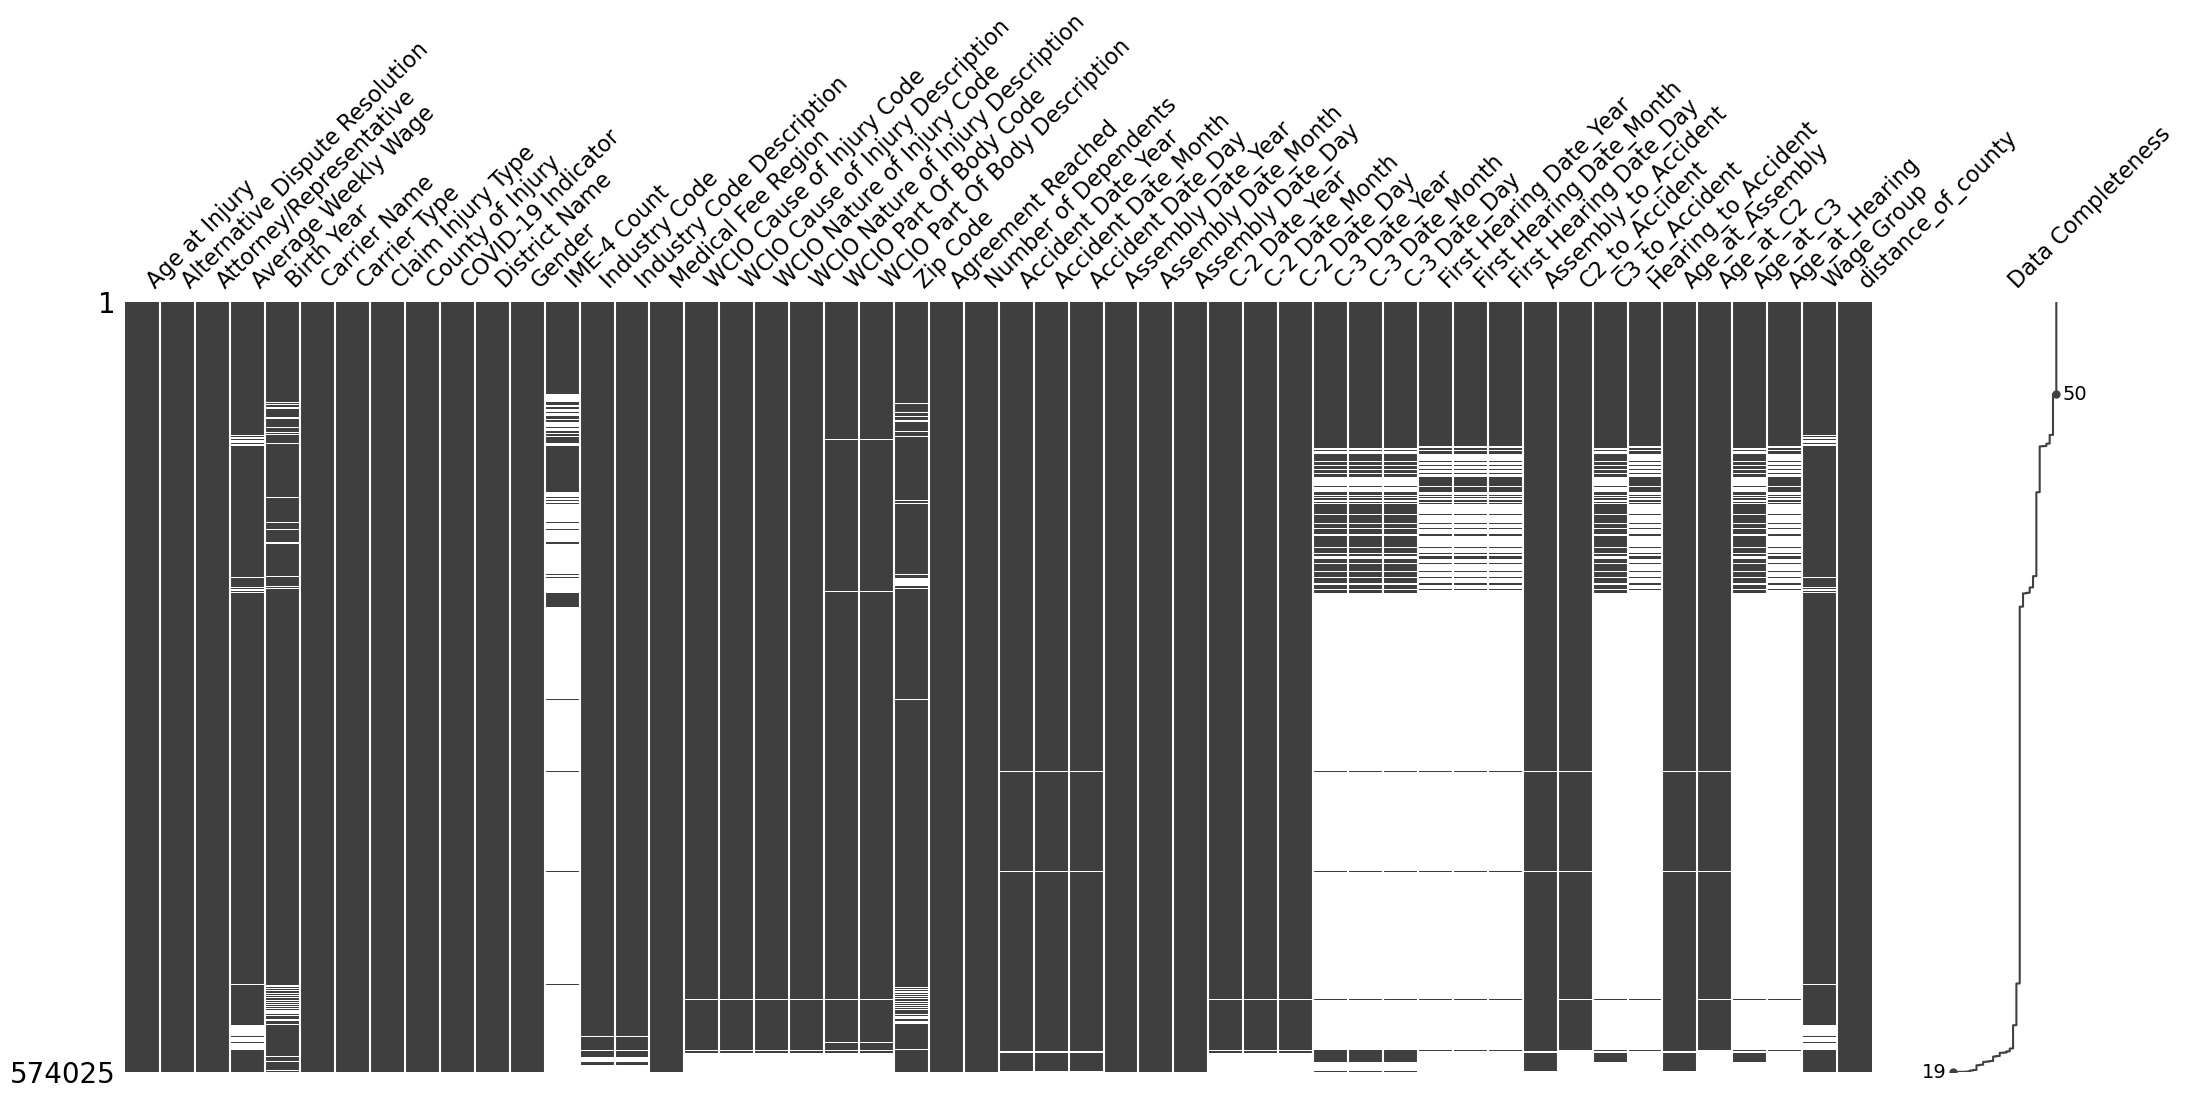

In [352]:
msno.matrix(train, labels=True, sort="descending");

In [353]:
train.isna().sum()

Age at Injury                             0
Alternative Dispute Resolution            0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
Gender                                    0
IME-4 Count                          441222
Industry Code                          9957
Industry Code Description              9957
Medical Fee Region                        0
WCIO Cause of Injury Code             15639
WCIO Cause of Injury Description      15639
WCIO Nature of Injury Code            15656
WCIO Nature of Injury Description     15656
WCIO Part Of Body Code                17081
WCIO Part Of Body Description         17081
Zip Code                        

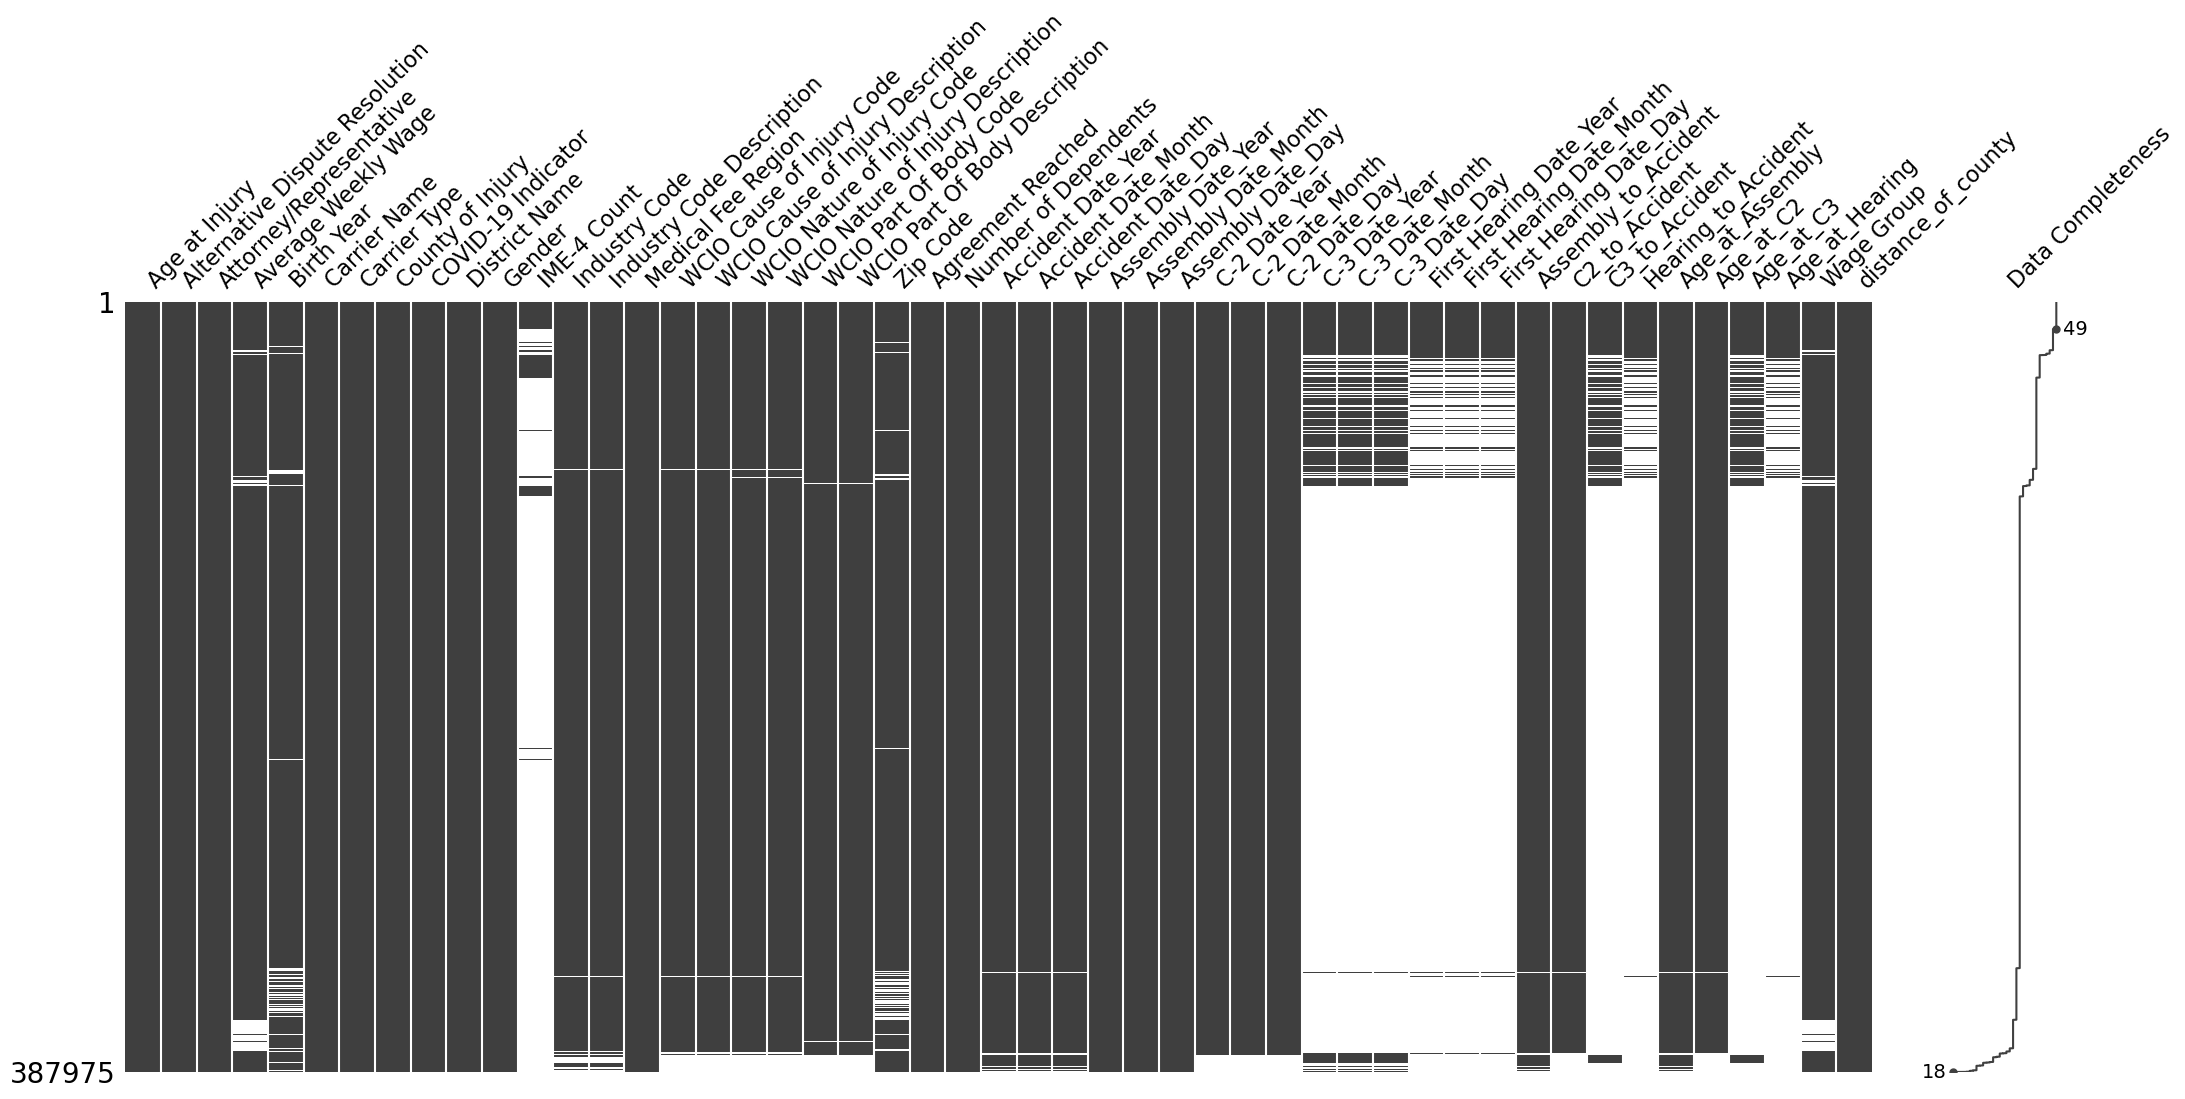

In [354]:
msno.matrix(test, labels=True, sort="descending");

In [355]:
test.isna().sum()

Age at Injury                             0
Alternative Dispute Resolution            0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
Gender                                    0
IME-4 Count                          352726
Industry Code                          7736
Industry Code Description              7736
Medical Fee Region                        0
WCIO Cause of Injury Code             10348
WCIO Cause of Injury Description      10348
WCIO Nature of Injury Code            10560
WCIO Nature of Injury Description     10560
WCIO Part Of Body Code                 9549
WCIO Part Of Body Description          9549
Zip Code                              19342
Agreement Reached               

####  Replacing NaN with nearest neighbor

we used knn to fill the code columns, like 'Injury Code', with the value of the most similar claim 

and then accurately, using the dictionary build before, fill the associated description

In [356]:
def KNN_Imputer(X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat, code_maps, float_to_object):
    # Select only the float_to_object features for KNN imputation
    float_to_object_features = [col for col in float_to_object if col in X_train_num.columns]
    print(f"Float to Object Features: {float_to_object_features}")

    X_train_num_knn = X_train_num[float_to_object_features]
    X_val_num_knn = X_val_num[float_to_object_features]
    X_test_num_knn = X_test_num[float_to_object_features]

    # Impute missing values in float_to_object features using KNN
    imputer = KNNImputer(n_neighbors=1).fit(X_train_num_knn)
    train_num_imp_knn = imputer.transform(X_train_num_knn)
    val_num_imp_knn = imputer.transform(X_val_num_knn)
    test_num_imp_knn = imputer.transform(X_test_num_knn)

    # Convert imputed numerical features back to DataFrames
    train_num_df_knn = pd.DataFrame(train_num_imp_knn, columns=X_train_num_knn.columns, index=X_train_num_knn.index)
    val_num_df_knn = pd.DataFrame(val_num_imp_knn, columns=X_val_num_knn.columns, index=X_val_num_knn.index)
    test_num_df_knn = pd.DataFrame(test_num_imp_knn, columns=X_test_num_knn.columns, index=X_test_num_knn.index)

    # Replace the original float_to_object features with the imputed ones
    X_train_num[float_to_object_features] = train_num_df_knn
    X_val_num[float_to_object_features] = val_num_df_knn
    X_test_num[float_to_object_features] = test_num_df_knn

    # Combine numerical and categorical features
    train_combined = combine_df(X_train_num, X_train_cat)
    val_combined = combine_df(X_val_num, X_val_cat)
    test_combined = combine_df(X_test_num, X_test_cat)

    #print(train_combined.columns)
    
    # Map codes to descriptions
    for code, map_dict in code_maps.items():
        if code == 'Industry Code':
            code_name = code + ' Description'
        else:
            code_name = code.replace(' Code', ' Description')
        if code_name in train_combined.columns:
            train_combined[code_name] = train_combined[code].map(map_dict).fillna(train_combined[code_name])
            val_combined[code_name] = val_combined[code].map(map_dict).fillna(val_combined[code_name])
            test_combined[code_name] = test_combined[code].map(map_dict).fillna(test_combined[code_name])
        else:
            print(f"Column {code_name} does not exist")

    X_train_num = train_combined.select_dtypes(include=np.number)
    X_val_num = val_combined.select_dtypes(include=np.number)
    X_test_num = test_combined.select_dtypes(include=np.number)
    X_train_cat = train_combined.select_dtypes(exclude=np.number)
    X_val_cat = val_combined.select_dtypes(exclude=np.number)
    X_test_cat = test_combined.select_dtypes(exclude=np.number)

    return X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat

we decided to input the other's missing values with the median or most frequent value

In [357]:
def imputing(X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat):
    #Using median for numerical data
    num_imputer = SimpleImputer(strategy="median")
    X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train_num), columns=X_train_num.columns)
    X_val_num = pd.DataFrame(num_imputer.transform(X_val_num), columns=X_val_num.columns)
    X_test_num = pd.DataFrame(num_imputer.transform(X_test_num), columns=X_test_num.columns)

    #Using most frequent for categorical data
    cat_imputer = SimpleImputer(strategy="most_frequent")
    X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train_cat), columns=X_train_cat.columns)
    X_val_cat = pd.DataFrame(cat_imputer.transform(X_val_cat), columns=X_val_cat.columns)
    X_test_cat = pd.DataFrame(cat_imputer.transform(X_test_cat), columns=X_test_cat.columns)

    return X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat

<hr>
<a class="anchor" id="missingvalues">
    
## 4.8 Outliers
    
</a>

In [358]:
numeric_columns = train.select_dtypes(include=['number']).columns

num_cols = len(numeric_columns)
cols = 2
rows = (num_cols // cols) + (num_cols % cols) 

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

"\nnumeric_columns = train.select_dtypes(include=['number']).columns\n\nnum_cols = len(numeric_columns)\ncols = 2\nrows = (num_cols // cols) + (num_cols % cols) \n\nplt.figure(figsize=(15, 5 * rows))\nfor i, col in enumerate(numeric_columns, 1):\n    plt.subplot(rows, cols, i)\n    sns.boxplot(x=train[col])\n    plt.title(f'Boxplot of {col}')\n    plt.xlabel(col)\n\nplt.tight_layout()\nplt.show() "

Function to calculate IQR and identify outliers for a specific column

In [359]:
def identify_outliers_iqr_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

In [360]:
def remove_outliers(X_train):
    outliers = pd.Series([False] * len(X_train))
    
    # Removing outliers for 'Age at Injury'
    if 'Age at Injury' in X_train.columns:
        outliers_age = (X_train['Age at Injury'] < 12) | (X_train['Age at Injury'] > 80)
        outliers = outliers | outliers_age

    # Removing outliers for 'Average Weekly Wage'
    if 'Average Weekly Wage' in X_train.columns:
        outliers_wage = X_train['Average Weekly Wage'] > 1e5
        outliers = outliers | outliers_wage
    
    # Removing outliers for 'Birth Year'
    if 'Birth Year' in X_train.columns:
        outliers_birth_year = X_train['Birth Year'] == 0
        outliers = outliers | outliers_birth_year
    
    return outliers


In [361]:
def sub_outliers(X_train, columns_outliers): #, y_train
    for col in columns_outliers:
        outliers = identify_outliers_iqr_column(X_train, col)
        # Replace outliers with median
        median = X_train[col].median()
        X_train.loc[outliers, col] = median
    
    return X_train #, y_train

#train = sub_outliers(train, train.select_dtypes(include=[np.number]).columns)

In [362]:
"""
numeric_columns = train.select_dtypes(include=['number']).columns

num_cols = len(numeric_columns)
cols = 2
rows = (num_cols // cols) + (num_cols % cols)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show() """

"\nnumeric_columns = train.select_dtypes(include=['number']).columns\n\nnum_cols = len(numeric_columns)\ncols = 2\nrows = (num_cols // cols) + (num_cols % cols)\n\nplt.figure(figsize=(15, 5 * rows))\nfor i, col in enumerate(numeric_columns, 1):\n    plt.subplot(rows, cols, i)\n    sns.boxplot(x=train[col])\n    plt.title(f'Boxplot of {col}')\n    plt.xlabel(col)\n\nplt.tight_layout()\nplt.show() "

<hr>
<a class="anchor" id="missingvalues">
    
## 4.9 Feature Selection
    
</a>

if var == 0 then drop

In [363]:
def variance(X_train, threshold, return_variances=False):
    variances = X_train.var()
    low_variance_cols = variances[variances < threshold].index.tolist()
    if return_variances:
        return low_variance_cols, variances.to_dict()
    return low_variance_cols

spearman correlation

In [364]:
def high_correlated_vars(X_train, threshold):
    cor_spearman = X_train.corr(method='spearman')
    correlated_pairs = []
    for i in range(len(cor_spearman.columns)):
        for j in range(i):
            correlation = cor_spearman.iloc[i, j]
            if abs(correlation) >= threshold:
                correlated_pairs.append({
                    "feature_1": cor_spearman.columns[i],
                    "feature_2": cor_spearman.columns[j],
                    "correlation": correlation
                })
    return correlated_pairs

chi square

In [365]:
def TestIndependence(X,y,var,alpha=0.05):         
    dfObserved = pd.crosstab(y, X) 
    if dfObserved.empty:
        return f"Skipping column {var} due to empty observed table."
    if dfObserved.shape[0] < 2 or dfObserved.shape[1] < 2:
        return f"Skipping column {var} due to insufficient data for chi-square test."
    
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    return result

relation with the dependent variable

In [366]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)
    categories = cont_tab.index[:-1]
    target_categories = cont_tab.columns[:-1]
    
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    bottom = np.zeros(len(categories))
    colors = plt.cm.tab20.colors  # Use a colormap for different colors
    bars = []
    for i, target_cat in enumerate(target_categories):
        bar = plt.bar(categories, cont_tab.iloc[:-1, i].values, 0.55, bottom=bottom, color=colors[i % len(colors)])
        bars.append(bar[0])
        bottom += cont_tab.iloc[:-1, i].values
    plt.legend(bars, [f'$y_i={cat}$' for cat in target_categories])
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, i].values, cont_tab.iloc[:-1, -1].values) for i in range(len(target_categories))])
    
    plt.subplot(122)
    bottom = np.zeros(len(categories))
    bars = []
    for i, target_cat in enumerate(target_categories):
        bar = plt.bar(categories, obs_pct[i], 0.55, bottom=bottom, color=colors[i % len(colors)])
        bars.append(bar[0])
        bottom += obs_pct[i]
    plt.legend(bars, [f'$y_i={cat}$' for cat in target_categories])
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

def plot_and_test_correlation(df, target):
    for feature in df.select_dtypes(include='object').columns:
        print(f"Generating bar charts for {feature}...")
        bar_charts_categorical(df, feature, target)

#plot_and_test_correlation(train, 'Claim Injury Type')

rfe

In [367]:
def select_optimal_features_rfe(X_train, y_train, X_val, y_val, model, scoring_function=None):
    if scoring_function is None:
        scoring_function = lambda model, X, y: model.score(X, y)

    nof_list=np.arange(1, X_train.shape[1]+1)
    high_score = 0
    nof = 0
    train_score_list = []
    val_score_list = []

    for n in nof_list:
        rfe = RFE(estimator=model, n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_val_rfe = rfe.transform(X_val)
        model.fit(X_train_rfe, y_train)

        # Storing results on training data
        train_score = scoring_function(model, X_train_rfe, y_train)
        train_score_list.append(train_score)

        # Storing results on validation data
        val_score = scoring_function(model, X_val_rfe, y_val)
        val_score_list.append(val_score)

        # Check best score
        if val_score >= high_score:
            high_score = val_score
            nof = n

    # Fit RFE with the optimal number of features
    rfe = RFE(estimator=model, n_features_to_select=nof)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_].tolist()

    return selected_features, train_score_list, val_score_list

embedded methods

In [368]:
def select_best_features_embedded(X_train, y_train, model, threshold=None):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get the coefficients or feature importances
    if hasattr(model, 'coef_'):
        if model.coef_.ndim > 1:
            coef = pd.Series(model.coef_.mean(axis=0), index=X_train.columns)
        else:
            coef = pd.Series(model.coef_, index=X_train.columns)
    elif hasattr(model, 'feature_importances_'):
        coef = pd.Series(model.feature_importances_, index=X_train.columns)
    else:
        raise ValueError("The model does not have coef_ or feature_importances_ attributes")
    
    if threshold is not None:
        selected_features = coef[coef.abs() > threshold].index.tolist()
    else:
        selected_features = coef[coef != 0].index.tolist()
    
    return selected_features, coef

<hr>
<a class="anchor" id="missingvalues">
    
## 4.10 Scaling
    
</a>

we scaled our data to improve model performance and to equal the features contributions

In [369]:
def scaling(X_train, X_val, X_test, scaler):
    scaler.fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns).set_index(X_train.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns).set_index(X_val.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns).set_index(X_test.index)

    return X_train_scaled, X_val_scaled, X_test_scaled

<hr>
<a class="anchor" id="missingvalues">
    
## 4.11 Reducing Cardinality
    
</a>

to use some encoding strategies like OneHotEnconding we change some minority classes in each column as one

In [370]:
def reduce_cardinality(df, threshold=10, other_label='Other'):
    for col in df.select_dtypes(include='object').columns:
        value_counts = df[col].value_counts()
        frequent_values = value_counts[value_counts > threshold].index
        df[col] = df[col].apply(lambda x: x if x in frequent_values else other_label)
    return df

<hr>
<a class="anchor" id="missingvalues">
    
## 4.12 Encoding
    
</a>

we use encoding to prepare our categorical features to be used by a model

In [371]:
def encoding_independent(X_train, X_val, X_test, encoder):
    X_train = X_train.astype(str)
    X_val = X_val.astype(str)
    X_test = X_test.astype(str)
    
    encoder.fit(X_train)
    X_train_encoded = encoder.transform(X_train) 
    X_val_encoded = encoder.transform(X_val)
    X_test_encoded = encoder.transform(X_test)

    if isinstance(encoder, OneHotEncoder):
        feature_names = encoder.get_feature_names_out(X_train.columns)
        X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
        X_val_encoded = pd.DataFrame(X_val_encoded, columns=feature_names, index=X_val.index)
        X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)
    else:
        X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns, index=X_train.index)
        X_val_encoded = pd.DataFrame(X_val_encoded, columns=X_val.columns, index=X_val.index)
        X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns, index=X_test.index)
    
    return X_train_encoded, X_val_encoded, X_test_encoded

In [372]:
def encoding_dependent(y_train, y_val, encoder):
    encoder.fit(y_train)
    y_train_encoded = pd.Series(encoder.transform(y_train))
    y_val_encoded = pd.Series(encoder.transform(y_val))

    return y_train_encoded, y_val_encoded

<hr>
<a class="anchor" id="missingvalues">
    
## 4.13 Balacing Classes
    
</a>

In [373]:
def custom_sampling_strategy(y):
    class_counts = np.bincount(y)
    max_count = np.max(class_counts)
    sampling_strategy = {}
    for i, count in enumerate(class_counts):
        if i in [5, 6, 7]:  # minority classes
            sampling_strategy[i] = 4000
        else:
            sampling_strategy[i] = count  # use the original count for other classes
    return sampling_strategy

In [374]:
def balance_data(X, y, method='oversample'):
    if method == 'oversample':
        sampler = RandomOverSampler(random_state=42)
    elif method == 'undersample':
        sampler = RandomUnderSampler(random_state=42)
    elif method == 'smote':
        sampler = SMOTEENN(random_state=42, sampling_strategy=custom_sampling_strategy(y))
    else:
        raise ValueError("Method should be 'oversample', 'undersample', or 'smote'")
    
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled

<hr>
<a class="anchor" id="missingvalues">
    
## 4.14 PCA
    
</a>

In [375]:
def apply_pca(X_train, X_val, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)
    pca_feat_names = [f'PC{i}' for i in range(n_components)]

    X_train_pca = pd.DataFrame(X_train_pca, index=X_train.index, columns=pca_feat_names)
    X_val_pca = pd.DataFrame(X_val_pca, index=X_val.index, columns=pca_feat_names)
    X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns=pca_feat_names)
    
    return X_train_pca, X_val_pca, X_test_pca, pca_feat_names

<hr>
<a class="anchor" id="initialanalysis">
    
# 5. Modeling and Evaluation
    
</a>



<hr>
<a class="anchor" id="missingvalues">
    
## 5.1 Prepare the data
    
</a>

In [376]:
def pre_processing_pipeline(train, test, split_method, feature_selection, scaler, encoder_independent, encoder_dependent, balance_method):
    X = train.drop(columns=['Claim Injury Type'])
    y = train['Claim Injury Type']

    X_train_num, X_train_cat = split_df(X)
    if feature_selection:
            print("Starting Variance")
            low_variance_cols, variances = variance(X_train_num, 1, True)
            print(low_variance_cols)
            print(variances)    
            X_train_num = X_train_num.drop(columns=low_variance_cols)
            X_val_num = X_val_num.drop(columns=low_variance_cols)
            X_test_num = X_test_num.drop(columns=low_variance_cols)
            print("Variance OK")
            print("Starting High Correlated Vars")
            correlated_pairs = high_correlated_vars(X_train_num, 0.8)
            print(correlated_pairs)
            correlated_to_drop = ['Age at Injury', 'Birth Year', 'C-2 Date_Year', 'C-2 Date_Month', 'C-2 Date_Day', 'C-2_to_Accident', 'Age_at_C2']
            X_train_num = X_train_num.drop(columns=correlated_to_drop)
            X_val_num = X_val_num.drop(columns=correlated_to_drop)
            X_test_num = X_test_num.drop(columns=correlated_to_drop)
            print("High Correlated Vars OK")
            print("Starting Test Independence")
            for col in X_train_cat.columns:
                print(TestIndependence(X_train_cat[col], y, col))
            print("Test Independence OK")
    X = combine_df(X_train_num, X_train_cat)
    
    print("Starting Split Data")
    splits = split_data(X, y, test, split_method)
    print("Split data OK")

    results = []

    for i, X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat, y_train, y_val in splits:
        print(f"\nSplit {i+1}:")
        print("Starting Outliers")
        print(f"Train shape before removing outliers: {X_train_num.shape}")
        outliers = remove_outliers(X_train_num)
        X_train_num = X_train_num[~outliers]
        X_train_cat = X_train_cat[~outliers]
        y_train = y_train[~outliers]
        print(f"Train shape after removing outliers: {X_train_num.shape}")
        print("Outliers OK")

        print("Starting KNN Imputer")
        X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat = KNN_Imputer(X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat, code_maps, float_to_object)
        print("KNN Imputer OK")
        print("Starting Imputing")
        X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat = imputing(X_train_num, X_val_num, X_test_num, X_train_cat, X_val_cat, X_test_cat)
        print("Imputing OK")

        X_train = combine_df(X_train_num, X_train_cat)
        X_val = combine_df(X_val_num, X_val_cat)
        X_test = combine_df(X_test_num, X_test_cat)
        X_train, X_val, X_test = to_object(X_train, X_val, X_test)
        X_train_num, X_train_cat = split_df(X_train)
        X_val_num, X_val_cat = split_df(X_val)
        X_test_num, X_test_cat = split_df(X_test)

        print("Starting Scaling")
        X_train_num, X_val_num, X_test_num = scaling(X_train_num, X_val_num, X_test_num, scaler)
        print("Scaling OK")

        print("Starting Reducing Cardinality")
        X_train_cat = reduce_cardinality(X_train_cat)
        X_val_cat = reduce_cardinality(X_val_cat)
        X_test_cat = reduce_cardinality(X_test_cat)
        print("Reducing Cardinality OK")

        print("Starting Encoding Independent")
        X_train_cat, X_val_cat, X_test_cat = encoding_independent(X_train_cat, X_val_cat, X_test_cat, encoder_independent)
        print("Encoding Independent OK")
        print("Starting Encoding Dependent")
        y_train, y_val = encoding_dependent(y_train, y_val, encoder_dependent)
        print("Encoding Dependent OK")

        # print("Starting PCA")
        # X_train_num, X_val_num, X_test_num, pca_feat_names = apply_pca(X_train_num, X_val_num, X_test_num, 7)
        # print("PCA OK")

        X_train = combine_df(X_train_num, X_train_cat)
        X_val = combine_df(X_val_num, X_val_cat)
        X_test = combine_df(X_test_num, X_test_cat)
        
        if balance_method is not None:
            print("Starting Balance Data")
            X_train, y_train = balance_data(X_train, y_train, balance_method)
            print("Balance Data OK")

        results.append((X_train, X_val, X_test, y_train, y_val))

    return results

In [377]:
normal_split = None
kf = KFold(n_splits=10) #if the splits are too many, poor efficiency
rkf = RepeatedKFold(n_splits=6, n_repeats=2)  
loo = LeaveOneOut() #not good due the size of the dataset
skf = StratifiedKFold(n_splits=10)  #good for imbalanced datasets

min_max = MinMaxScaler()
min_max2 = MinMaxScaler(feature_range=(-1, 1))
standard = StandardScaler()
robust = RobustScaler()

oneHot = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
label = LabelEncoder()

oversample = 'oversample'
undersample = 'undersample'
smote = 'smote'
no_balance = None

In [378]:
processed_data = pre_processing_pipeline(train, test, skf, False, standard, ordinal, label, no_balance)
for i, (X_train, X_val, X_test, y_train, y_val) in enumerate(processed_data):
    print(f"Split {i+1}:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
    print(f"X_test shape: {X_test.shape}")

Starting Split Data
Split data OK
Starting Outliers
Train shape before removing outliers: (516622, 34)
Train shape after removing outliers: (495026, 34)
Outliers OK
Starting KNN Imputer
Float to Object Features: ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
KNN Imputer OK
Starting Imputing
Imputing OK
Starting Scaling
Scaling OK
Reducing Cardinality
Reducing Cardinality OK
Starting Encoding Independent
Encoding Independent OK
Starting Encoding Dependent
Encoding Dependent OK
Starting Outliers
Train shape before removing outliers: (516622, 34)
Train shape after removing outliers: (494026, 34)
Outliers OK
Starting KNN Imputer
Float to Object Features: ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
KNN Imputer OK
Starting Imputing
Imputing OK
Starting Scaling
Scaling OK
Reducing Cardinality
Reducing Cardinality OK
Starting Encoding Independent
Encoding Independent OK
Starting E

KeyboardInterrupt: 

<hr>
<a class="anchor" id="missingvalues">
    
## 5.2 Models
    
</a>

in case of rfe or grid search we just need one of the splits, so in this cases we are using this

In [295]:
X_train, X_val, X_test, y_train, y_val = processed_data[0]

#### Gradient Boost

In [296]:
def train_xgb(X_train, y_train, X_val, y_val, rfe, random_state=42):
    """Train XGB model"""
    print("\nTraining XGB model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    model = XGBClassifier(
        n_estimators=250,
        learning_rate=0.1,
        max_depth=6,
        random_state=random_state,
        n_jobs=2,
        tree_method='hist',
        enable_categorical=True,
        objective='multi:softprob',
        num_class=8,
        eval_metric=['mlogloss', 'merror'],
        use_label_encoder=False
    )
    if rfe:
        # Select optimal features using RFE
        selected_features, train_scores, val_scores = select_optimal_features_rfe(X_train, y_train, X_val, y_val, model)
        print(f"Selected {len(selected_features)} features: {selected_features}")
        print(f"Train scores: {train_scores}")
        print(f"Validation scores: {val_scores}")

        # Select best features using embedded method
        select_features, coef = select_best_features_embedded(X_train, y_train, model, 0.01)
        print(f"Selected {len(select_features)} features: {select_features}")
        print(f"Feature importances: {coef}")
    else:
        # Train with early stopping
        eval_set = [(X_train, y_train)]
        model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=True
        )
    
    return model

for i, (X_train, X_val, X_test, y_train, y_val) in enumerate(processed_data):
    print(f"Split {i+1}:")
    modelXGB = train_xgb(X_train, y_train, X_val, y_val, False)

Split 1:

Training XGB model...
Starting training with 26 features...
[0]	validation_0-mlogloss:1.84594	validation_0-merror:0.23172
[1]	validation_0-mlogloss:1.67810	validation_0-merror:0.22619
[2]	validation_0-mlogloss:1.54694	validation_0-merror:0.22630
[3]	validation_0-mlogloss:1.44002	validation_0-merror:0.22666
[4]	validation_0-mlogloss:1.35073	validation_0-merror:0.22551
[5]	validation_0-mlogloss:1.27407	validation_0-merror:0.22379
[6]	validation_0-mlogloss:1.20855	validation_0-merror:0.22385
[7]	validation_0-mlogloss:1.15148	validation_0-merror:0.22352
[8]	validation_0-mlogloss:1.10109	validation_0-merror:0.22348
[9]	validation_0-mlogloss:1.05618	validation_0-merror:0.22261
[10]	validation_0-mlogloss:1.01645	validation_0-merror:0.22238
[11]	validation_0-mlogloss:0.98110	validation_0-merror:0.22177
[12]	validation_0-mlogloss:0.94960	validation_0-merror:0.22157
[13]	validation_0-mlogloss:0.92093	validation_0-merror:0.22107
[14]	validation_0-mlogloss:0.89533	validation_0-merror:0.2

#### Histogram Gradient Boost

In [297]:
def train_hist_gb(X_train, y_train, X_val, y_val, rfe, random_state=42):
    """Train HistGB model"""
    print("\nTraining HistGB model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    model = HistGradientBoostingClassifier(
        max_iter=100,
        learning_rate=0.1,
        max_depth=None,
        random_state=random_state,
        verbose=1
    )
    if rfe:
        # Select optimal features using RFE
        selected_features, train_scores, val_scores = select_optimal_features_rfe(X_train, y_train, X_val, y_val, model)
        print(f"Selected {len(selected_features)} features: {selected_features}")
        print(f"Train scores: {train_scores}")
        print(f"Validation scores: {val_scores}")

        # Select best features using embedded method
        select_features, coef = select_best_features_embedded(X_train, y_train, model, 0.01)
        print(f"Selected {len(select_features)} features: {select_features}")
        print(f"Feature importances: {coef}")
    else:
        model.fit(X_train, y_train)
    
    return model

for i, (X_train, X_val, X_test, y_train, y_val) in enumerate(processed_data):
    print(f"Split {i+1}:")
    modelHGB = train_hist_gb(X_train, y_train, X_val, y_val, False)

Split 1:

Training HistGB model...
Starting training with 26 features...
Binning 0.072 GB of training data: 0.604 s
Binning 0.008 GB of validation data: 0.017 s
Fitting gradient boosted rounds:
[1/100] 8 trees, 248 leaves (31 on avg), max depth = 12, train loss: 1.15655, val loss: 1.17184, in 0.348s
[2/100] 8 trees, 248 leaves (31 on avg), max depth = 12, train loss: 1.09702, val loss: 1.06075, in 0.330s
[3/100] 8 trees, 248 leaves (31 on avg), max depth = 12, train loss: 1.04919, val loss: 1.02315, in 0.328s
[4/100] 8 trees, 248 leaves (31 on avg), max depth = 17, train loss: 1.00098, val loss: 0.94974, in 0.334s
[5/100] 8 trees, 248 leaves (31 on avg), max depth = 13, train loss: 1.01002, val loss: 0.93972, in 0.336s
[6/100] 8 trees, 248 leaves (31 on avg), max depth = 12, train loss: 0.98490, val loss: 0.89204, in 0.343s
[7/100] 8 trees, 248 leaves (31 on avg), max depth = 13, train loss: 0.97377, val loss: 0.84855, in 0.364s
[8/100] 8 trees, 248 leaves (31 on avg), max depth = 13, 

#### Random Forest

In [298]:
def train_simple_rf(X_train, y_train, X_val, y_val, rfe, random_state=42):
    """Train Simple RF model"""
    print("\nTraining Simple RF model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=random_state,
        n_jobs=2,
        verbose=1,
        class_weight='balanced'
    )
    if rfe:
        # Select optimal features using RFE
        selected_features, train_scores, val_scores = select_optimal_features_rfe(X_train, y_train, X_val, y_val, model)
        print(f"Selected {len(selected_features)} features: {selected_features}")
        print(f"Train scores: {train_scores}")
        print(f"Validation scores: {val_scores}")

        # Select best features using embedded method
        select_features, coef = select_best_features_embedded(X_train, y_train, model, 0.01)
        print(f"Selected {len(select_features)} features: {select_features}")
        print(f"Feature importances: {coef}")
    else:
        model.fit(X_train, y_train)
    
    return model

for i, (X_train, X_val, X_test, y_train, y_val) in enumerate(processed_data):
    print(f"Split {i+1}:")
    modelRF = train_simple_rf(X_train, y_train, X_val, y_val, False)

Split 1:

Training Simple RF model...
Starting training with 26 features...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   33.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.3min finished


#### Logistic Regression

In [299]:
def train_logistic_regression(X_train, y_train, X_val, y_val, rfe):
    """Train Logistic Regression model"""
    print("\nTraining Logistic Regression model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    model = LogisticRegression(class_weight='balanced', max_iter=1000)

    if rfe:
        # Select optimal features using RFE
        selected_features, train_scores, val_scores = select_optimal_features_rfe(X_train, y_train, X_val, y_val, model)
        print(f"Selected {len(selected_features)} features: {selected_features}")
        print(f"Train scores: {train_scores}")
        print(f"Validation scores: {val_scores}")

        # Select best features using embedded method
        select_features, coef = select_best_features_embedded(X_train, y_train, model, 0.01)
        print(f"Selected {len(select_features)} features: {select_features}")
        print(f"Feature importances: {coef}")
    else:
        model.fit(X_train, y_train)
    
    return model
    
for i, (X_train, X_val, X_test, y_train, y_val) in enumerate(processed_data):
    print(f"Split {i+1}:")
    modelLR = train_logistic_regression(X_train, y_train, X_val, y_val, False)

Split 1:

Training Logistic Regression model...
Starting training with 26 features...


#### Decision Tree

In [300]:
# param_dt = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features': [None, 'sqrt', 'log2']
# }

# grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, scoring='f1_macro', cv=5)
# grid_dt.fit(X_train, y_train)

# print("Best DecisionTree Parameters:", grid_dt.best_params_)
# print("Best DecisionTree F1 Score:", grid_dt.best_score_)

In [ ]:
def train_decision_tree(X_train, y_train, X_val, y_val, rfe):
    """Train Decision Tree model"""
    print("\nTraining Decision Tree model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, min_samples_leaf=2, max_features=None, class_weight='balanced')

    if rfe:
        # Select optimal features using RFE
        selected_features, train_scores, val_scores = select_optimal_features_rfe(X_train, y_train, X_val, y_val, model)
        print(f"Selected {len(selected_features)} features: {selected_features}")
        print(f"Train scores: {train_scores}")
        print(f"Validation scores: {val_scores}")

        # Select best features using embedded method
        select_features, coef = select_best_features_embedded(X_train, y_train, model, 0.01)
        print(f"Selected {len(select_features)} features: {select_features}")
        print(f"Feature importances: {coef}")
    else:
        model.fit(X_train, y_train)
    
    return model

for i, (X_train, X_val, X_test, y_train, y_val) in enumerate(processed_data):
    print(f"Split {i+1}:")
    modelDT = train_decision_tree(X_train, y_train, X_val, y_val, False)

Split 1:

Training Decision Tree model...
Starting training with 26 features...


#### Naive Bayes

In [302]:
# X_train_num, X_train_cat = split_df(X_train)

# param_cnb = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
# param_gnb = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.001, 0.1]}

# grid_cnb = GridSearchCV(CategoricalNB(), param_cnb, scoring='f1_macro', cv=3)
# grid_cnb.fit(X_train_cat, y_train)

# grid_gnb = GridSearchCV(GaussianNB(), param_gnb, scoring='f1_macro', cv=3)
# grid_gnb.fit(X_train_num, y_train)

# print(f"Best CategoricalNB params: {grid_cnb.best_params_}")
# print(f"Best GaussianNB params: {grid_gnb.best_params_}")

In [303]:
def naive_bayes(X_train, y_train, X_val, y_val, rfe):
    """Train Naive Bayes model"""
    print("\nTraining Naive Bayes model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    X_train_num, X_train_cat = split_df(X_train)
    X_val_num, X_val_cat = split_df(X_val)

    model1 = GaussianNB(var_smoothing=1e-7)
    model2 = CategoricalNB(alpha= 0.1)

    if rfe:
        # Select optimal features using RFE
        selected_features, train_scores, val_scores = select_optimal_features_rfe(X_train_num, y_train, X_val_num, y_val, model1)
        print(f"Selected {len(selected_features)} features: {selected_features}")
        print(f"Train scores: {train_scores}")
        print(f"Validation scores: {val_scores}")

        # Select best features using embedded method
        select_features, coef = select_best_features_embedded(X_train_num, y_train, model1, 0.01)
        print(f"Selected {len(select_features)} features: {select_features}")
        print(f"Feature importances: {coef}")
    else:
        model1.fit(X_train_num, y_train)
        model2.fit(X_train_cat, y_train)
    
    return model1, model2

# for i, (X_train, X_val, X_test, y_train, y_val) in enumerate(processed_data):
#     print(f"Split {i+1}:")
#     modelGNB, modelCNB = naive_bayes(X_train, y_train, X_val, y_val, False)

<hr>
<a class="anchor" id="missingvalues">
    
## 5.3 Evaluate models
    
</a>

In [ ]:
def evaluate_models(X_val, y_val, X_test):
    models = {
        'LogisticRegression': modelLR, 
        'HistGB': modelHGB,
        'RF': modelRF,
        'DT': modelDT,
        # 'GaussianNB': modelGNB,
        'XGB': modelXGB
    }

    best_model = None
    best_score = 0
    best_report = None

    for name, model in models.items():
        print(f"Model: {name}")
        y_pred = model.predict(X_val)
        report = classification_report(y_val, y_pred)
        print(report)
        score = f1_score(y_val, y_pred, average='macro')
        print(f"F1-score: {score:.4f}")
        print()

        if score > best_score:
            best_score = score
            best_model = model
            best_report = report

    print(f"Best model: {best_model.__class__.__name__}")
    print("Best classification report:")
    print(best_report)
    test_pred = best_model.predict(X_test)
    
    return test_pred, best_model

test_pred, best_model = evaluate_models(X_val, y_val, X_test)

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.07      0.60      0.13      3743
           1       0.85      0.67      0.75     87324
           2       0.19      0.11      0.14     20672
           3       0.74      0.25      0.37     44552
           4       0.40      0.44      0.42     14484
           5       0.05      0.35      0.09      1263
           6       0.00      0.38      0.00        29
           7       0.01      0.70      0.01       141

    accuracy                           0.47    172208
   macro avg       0.29      0.44      0.24    172208
weighted avg       0.68      0.47      0.53    172208

F1-score: 0.2389

Model: HistGB
              precision    recall  f1-score   support

           0       0.70      0.37      0.48      3743
           1       0.83      0.98      0.90     87324
           2       0.48      0.02      0.04     20672
           3       0.73      0.88      0.80     44552
           4       0

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished


              precision    recall  f1-score   support

           0       0.18      0.73      0.29      3743
           1       0.87      0.89      0.88     87324
           2       0.37      0.05      0.09     20672
           3       0.78      0.49      0.61     44552
           4       0.49      0.67      0.57     14484
           5       0.05      0.68      0.10      1263
           6       0.00      0.00      0.00        29
           7       0.05      0.56      0.08       141

    accuracy                           0.66    172208
   macro avg       0.35      0.51      0.33    172208
weighted avg       0.73      0.66      0.67    172208

F1-score: 0.3265

Model: DT
              precision    recall  f1-score   support

           0       0.11      0.61      0.18      3743
           1       0.86      0.82      0.84     87324
           2       0.00      0.00      0.00     20672
           3       0.76      0.37      0.49     44552
           4       0.38      0.51      0.44     14

<hr>
<a class="anchor" id="missingvalues">
    
## 5.4 Export results
    
</a>

In [305]:
CLAIM_TYPE_MAPPING = {
    1: '1. CANCELLED',
    2: '2. NON-COMP',
    3: '3. MED ONLY',
    4: '4. TEMPORARY',
    5: '5. PPD SCH LOSS',
    6: '6. PPD NSL',
    7: '7. PTD',
    8: '8. DEATH'
    }

def create_submission_df(predictions, test_df):
    # Add 1 to predictions to convert back to original scale (0-7 to 1-8)
    numeric_predictions = predictions + 1
    
    # Map numeric predictions to claim type strings
    claim_types = [CLAIM_TYPE_MAPPING[pred] for pred in numeric_predictions]
    
    # Create submission dataframe using original (unscaled) claim identifiers
    submission = pd.DataFrame({
        'Claim Identifier': test_df['Claim Identifier'].astype(int),  # Original claim IDs
        'Claim Injury Type': claim_types  # Full claim type names
    })
    
    return submission

In [306]:
def save_submission(submission_df, experiment_name):
    filename = f'submission_{experiment_name}.csv'
    submission_df.to_csv(filename, index=False)
    print(f"\nSubmission saved to {filename}")
    
    # Display sample of submission
    print("\nSubmission sample:")
    print(submission_df.head())
    print("\nValue counts:")
    print(submission_df['Claim Injury Type'].value_counts())

In [ ]:
model_1 = 'Model new'
original_claim_ids = test.index.copy()
submission_df = create_submission_df(test_pred, pd.DataFrame({'Claim Identifier': original_claim_ids}))
save_submission(submission_df, model_1)


Submission saved to submission_Model new.csv

Submission sample:
   Claim Identifier Claim Injury Type
0           6165911       2. NON-COMP
1           6166141       2. NON-COMP
2           6165907       2. NON-COMP
3           6166047       2. NON-COMP
4           6166102       2. NON-COMP

Value counts:
Claim Injury Type
2. NON-COMP        295331
4. TEMPORARY        55811
3. MED ONLY         32836
1. CANCELLED         2452
5. PPD SCH LOSS      1521
8. DEATH               24
Name: count, dtype: int64


<hr>
<a class="anchor" id="initialanalysis">
    
# 6. Open Section
    
</a>



In [ ]:
# Store objects with pickle protocol 4
%store best_model
%store submission_df
%store X_test

Stored 'best_model' (XGBClassifier)
Stored 'submission_df' (DataFrame)
Stored 'X_test' (DataFrame)
